In [191]:
# Initialize formulas that calculate XmR data, using either the median or average

import statistics

def xmr_data_from_median(data):
  average = sum(data) / len(data)

  moving_ranges = []

  for i in range(1, len(data)):
    moving_ranges.append(abs(data[i - 1] - data[i]))

  moving_range = statistics.median(moving_ranges)

  # TODO Handle situations where there's a natural floor or ceiling
  upper_natural_process_limit = average + (3.14 * moving_range)
  lower_natural_process_limit = average - (3.14 * moving_range) 
  
  upper_range_limit = 3.87 * moving_range 

  return {
    'raw_data': data,
    'average': average,
    'moving_ranges': moving_ranges,
    'moving_range': moving_range,
    'upper_natural_process_limit': upper_natural_process_limit,
    'lower_natural_process_limit': lower_natural_process_limit,
    'upper_range_limit': upper_range_limit
  }

def xmr_data_from_average(data):
  average = sum(data) / len(data)

  moving_ranges = []

  for i in range(1, len(data)):
    moving_ranges.append(abs(data[i - 1] - data[i]))

  moving_range = sum(moving_ranges) / (len(moving_ranges))

  # TODO Handle situations where there's a natural floor or ceiling
  upper_natural_process_limit = average + (2.66 * moving_range)
  lower_natural_process_limit = average - (2.66 * moving_range) 
  
  upper_range_limit = 3.27 * moving_range 

  return {
    'raw_data': data,
    'average': average,
    'moving_ranges': moving_ranges,
    'moving_range': moving_range,
    'upper_natural_process_limit': upper_natural_process_limit,
    'lower_natural_process_limit': lower_natural_process_limit,
    'upper_range_limit': upper_range_limit
  }


In [192]:
#Invoke one of the two functions

sample_data = [10, 11, 15, 13, 12, 9, 9, 20, 13, 11, 10, 9, 9, 13, 13, 13, 13, 13, 13, 13, 13, 13]

xmr_data = xmr_data_from_median(sample_data)

# xmr_data = xmr_data_from_average(sample_data)


In [193]:
# Initialize plotting functions

import matplotlib.pyplot as plt

def plot_individual_values(xmr_data): 
  plt.plot(xmr_data['raw_data'], color='r', marker='o', label='Individual Data Points')

  plt.axhline(y=xmr_data['average'], color='b', linestyle='-', label='Average or Median')
  plt.axhline(y=xmr_data['upper_natural_process_limit'], color='b', linestyle='--', label='Upper Natural Process Limit')
  plt.axhline(y=xmr_data['lower_natural_process_limit'], color='b', linestyle='--', label='Lower Natural Process Limit')

  plt.legend(loc='upper left')
  plt.show()

def plot_moving_range(xmr_data):
  plt.plot(xmr_data['moving_ranges'], color='r', marker='o', label='Moving Range')

  plt.axhline(y=xmr_data['moving_range'], color='b', label='Average or Median Moving Range')
  plt.axhline(y=xmr_data['upper_range_limit'], color='b', linestyle='--', label='Upper Range Limit')

  plt.legend(loc='upper left')
  plt.show()
  

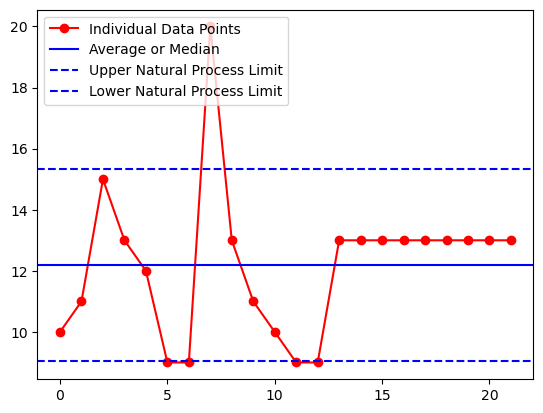

In [194]:
# Plot the first XmR graph

plot_individual_values(xmr_data)

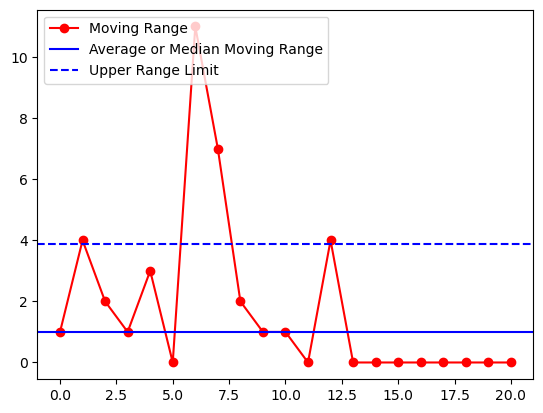

In [195]:
# Plot the second XmR chart

plot_moving_range(xmr_data)

In [196]:
# Initialize functions that check if limits have been exceeded

def has_exceeded_natural_process_limits(xmr_data):
  upper_limit_excesses = []
  lower_limit_excesses = []

  for i in range(len(xmr_data['raw_data'])):
    num = xmr_data['raw_data'][i]
    
    if num > xmr_data['upper_natural_process_limit']:
      upper_limit_excesses.append(num)

    if num < xmr_data['lower_natural_process_limit']:
      lower_limit_excesses.append(num)

  return (upper_limit_excesses, lower_limit_excesses)
  
def has_exceeded_moving_range_limits(xmr_data):
  limit_excesses = []
  
  for i in (range(len(xmr_data['moving_ranges']))):
    num = xmr_data['moving_ranges'][i]

    if num > xmr_data['upper_range_limit']:
      limit_excesses.append(num)

  return limit_excesses

In [197]:
# Invoke limit checks

upper_process_limit_excesses, lower_process_limit_excesses = has_exceeded_natural_process_limits(xmr_data)

print('Upper limit excesses: ', upper_process_limit_excesses)
print('Lower limit excesses: ', lower_process_limit_excesses)

moving_range_limit_excesses = has_exceeded_moving_range_limits(xmr_data)

print('Moving range limit excesses: ', moving_range_limit_excesses)

Upper limit excesses:  [20]
Lower limit excesses:  [9, 9, 9, 9]
Moving range limit excesses:  [4, 11, 7, 4]


In [198]:
# Define function that checks if 8 run test has passed or failed

def process_limits_eight_run_test(xmr_data):
  mode = None
  count = 0

  for i in (range(len(xmr_data['raw_data']))):
    num = xmr_data['raw_data'][i]
  
    if xmr_data['average'] < num < xmr_data['upper_natural_process_limit']:
      if mode == 'avg_upp':
        count += 1
      else: 
        mode = 'avg_upp'
        count = 1
    elif xmr_data['average'] > num > xmr_data['lower_natural_process_limit']:
      if mode == 'avg_low':
        count += 1
      else: 
        mode = 'avg_low'
        count = 1
    else:
      count = 0
      mode = None
    
    # TODO Add more context to failure
    if count >= 8:
      print('8 run test failed: ', mode)

def moving_range_eight_run_test(xmr_data):
  count = 0

  for i in (range(len(xmr_data['moving_ranges']))):
    num = xmr_data['raw_data'][i]
  
    if xmr_data['moving_range'] < num < xmr_data['upper_range_limit']:
      if count > 0:
        count += 1
      else:
        count = 1
    else:
      count = 0
    
    # TODO Add more context to failure
    if count >= 8:
      print('8 run test failed for moving range')

In [199]:
# Invoke run test functions

process_limits_eight_run_test(xmr_data)
moving_range_eight_run_test(xmr_data)

8 run test failed:  avg_upp
8 run test failed:  avg_upp


In [200]:

# Define function that checks if 3/4 run test has passed or failed
# TODO Define run test

In [201]:

# Invoke run test functions